# Trade&Ahead - Problem Statement

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

## Data Description
The data provided is of stock prices and some financial indicators like ROE, earnings per share, P/E ratio, etc.

**Data Dictionary**
- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
-GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
-GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
-Current Price: Current stock price in dollars
-Price Change: Percentage change in the stock price in 13 weeks
-Volatility: Standard deviation of the stock price over the past 13 weeks
-ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
-Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
-Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
-Net Income: Revenues minus expenses, interest, and taxes (in dollars)
-Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
-Estimated Shares Outstanding: Company's stock currently held by all its shareholders
-P/E Ratio: Ratio of the company's current stock price to the earnings per share
-P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)


## Importing necessary libraries and data

In [71]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to compute distances
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [35]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

In [4]:
data.shape

(340, 15)

<IPython.core.display.Javascript object>

* The dataset has 340 rows and 15 columns

In [7]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


<IPython.core.display.Javascript object>

In [36]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [9]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

*Observation*
- There are four coulumns with object datatype, and 11 columns of numerical with datatypes float and integers.

In [10]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,FLIR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,PepsiCo Inc.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


<IPython.core.display.Javascript object>

*Observations*

- The top economic sectors are the industries with 53 in number
- The top specific sub industries are the Oil & Gas Exploration & Production 16 in number
- The maximum current stock price is at $1,274.94

- The minimum current stock price $4.5

- The Average current stock price is $80.86

- The maximum price change in stock for the past 13 weeks is $55.05

- The Company's average Net income is $1,494,384,602.92

In [5]:
# Let's see unique values
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'Ticker Symbol' are 

 ['AAL' 'ABBV' 'ABT' 'ADBE' 'ADI' 'ADM' 'ADS' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV'
 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AME' 'AMG'
 'AMGN' 'AMP' 'AMT' 'AMZN' 'AN' 'ANTM' 'AON' 'APA' 'APC' 'APH' 'ARNC'
 'ATVI' 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAC' 'BAX' 'BBT' 'BCR' 'BHI' 'BIIB'
 'BK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C' 'CAT' 'CB' 'CBG' 'CCI' 'CCL'
 'CELG' 'CF' 'CFG' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CMA' 'CME'
 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS'
 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA'
 'DISCK' 'DLPH' 'DLR' 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'DVN' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EMN' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES' 'ESS' 'ETFC' 'ETN'
 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 'F' 'FAST' 'FB' 'FBHS' 'FCX' 'FE'
 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'FSLR' 'FTR' 'GD' 'GGP'
 'GILD' 'GLW' 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAL' 'HAS' 'HBAN' 'HCA' 'HCN'
 'HCP' 'HE

<IPython.core.display.Javascript object>

*Observation*
- We have columns that are strings containing a mix of values like "1.03288203e+01",I will apply lambda to it. 
- Column names that have are dots, spaces, and & will be replaced with (_)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [4]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

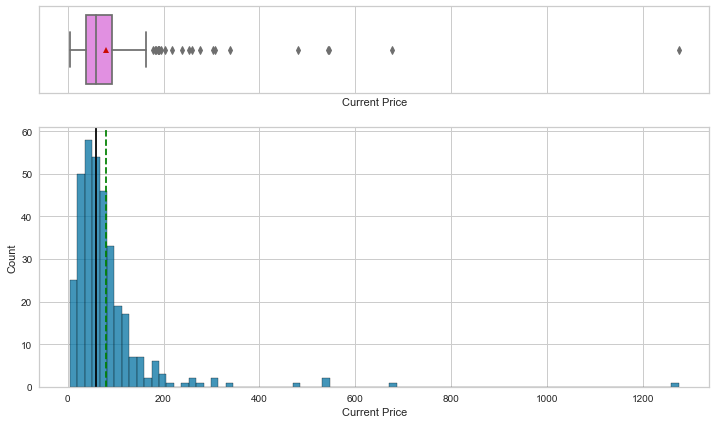

<IPython.core.display.Javascript object>

In [5]:
# Observations on Current Price
histogram_boxplot(data, "Current Price")

*Observation*
- The distribution is centered to the left
- There are outliers skewed to the right
- The count of the price fell from $200 upward

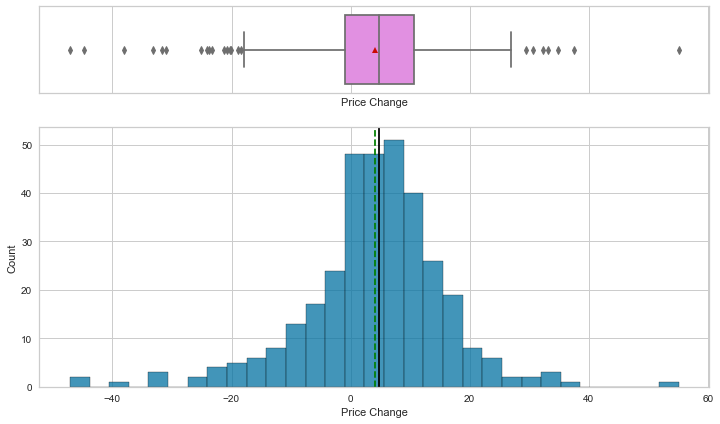

<IPython.core.display.Javascript object>

In [6]:
# Observations on Current Price
histogram_boxplot(data, "Price Change")

*Observation*
- The distribution is on both the negative and positive side
- There are outliers on both sides
- The median price change is slightly above 0 dollars                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

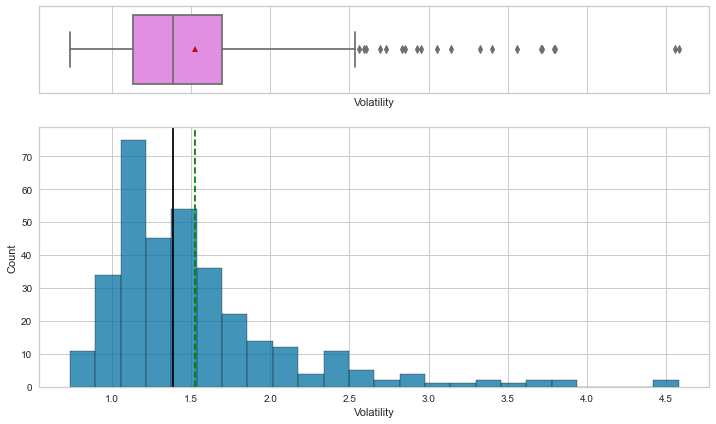

<IPython.core.display.Javascript object>

In [7]:
# Observations on Current Price
histogram_boxplot(data, "Volatility")

*Observation*
- There are outliers skwed to the right
- The distribution has a median of 15
- Once we pass 20 points the volatility drops further

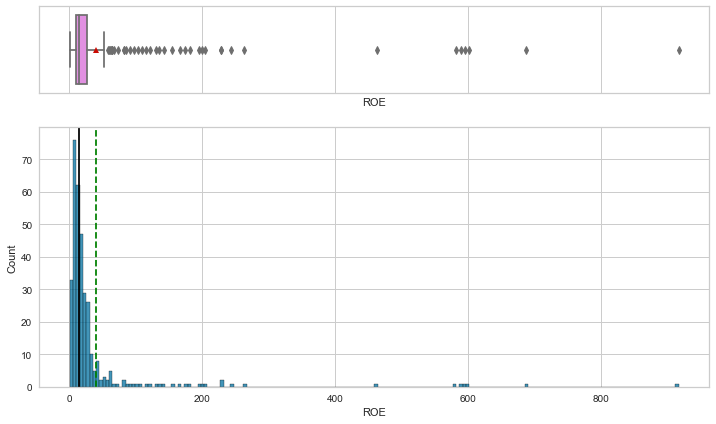

<IPython.core.display.Javascript object>

In [9]:
# Observations on Current Price
histogram_boxplot(data, "ROE")

*Observation*
- There are heavy outliers skewed to the right
- The median is less than $100 approximately

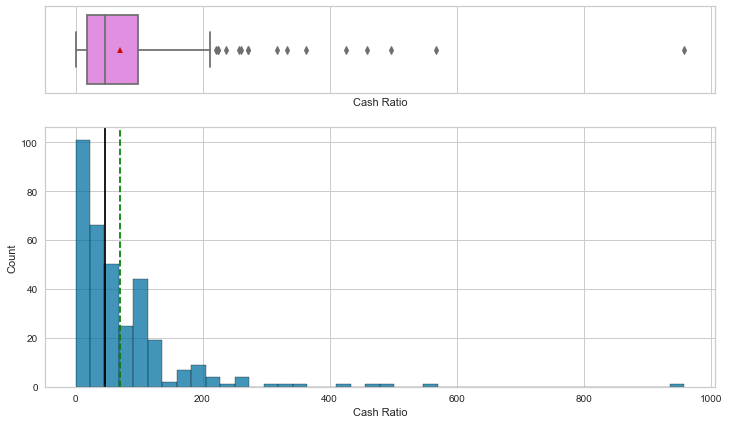

<IPython.core.display.Javascript object>

In [10]:
# Observations on Current Price
histogram_boxplot(data, "Cash Ratio")

*Observation*
- The distribution is skewed to the right
- There are outliers to the right
- As cash ratio increases the number of counts reduces

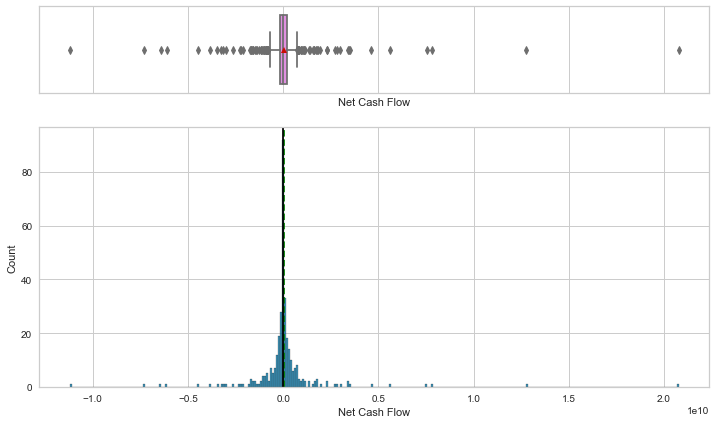

<IPython.core.display.Javascript object>

In [11]:
# Observations on Current Price
histogram_boxplot(data, "Net Cash Flow")

*Observation*
- The distribution is skewed to both the left and right
- Ther are outliers on both sides
- The median net cash flow is zero

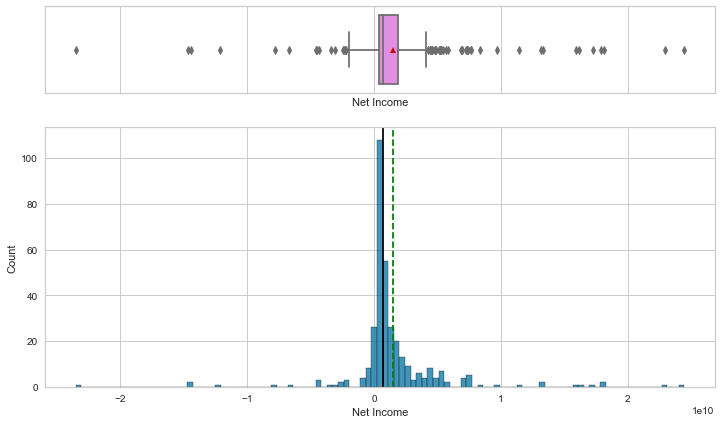

<IPython.core.display.Javascript object>

In [12]:
# Observations on Current Price
histogram_boxplot(data, "Net Income")

**Observation**
- The distribution is both left and right skewed
- There are outliers on both sides
- The average Net Income less than 1 

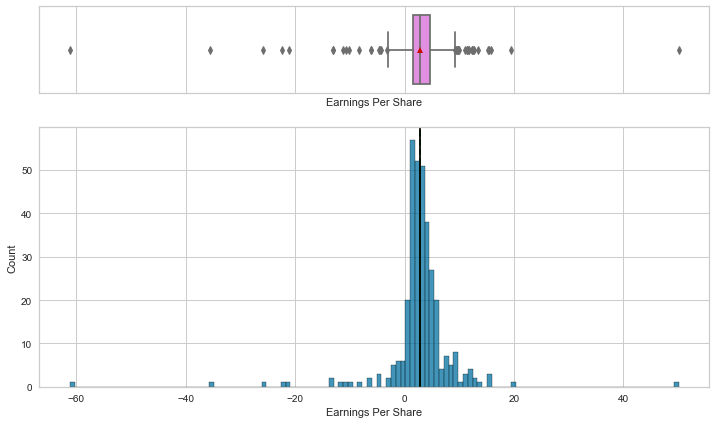

<IPython.core.display.Javascript object>

In [13]:
# Observations on Current Price
histogram_boxplot(data, "Earnings Per Share")

**Observation**

- There are Outliers to the left and to the right
- The maximum Earnings per share is above $40

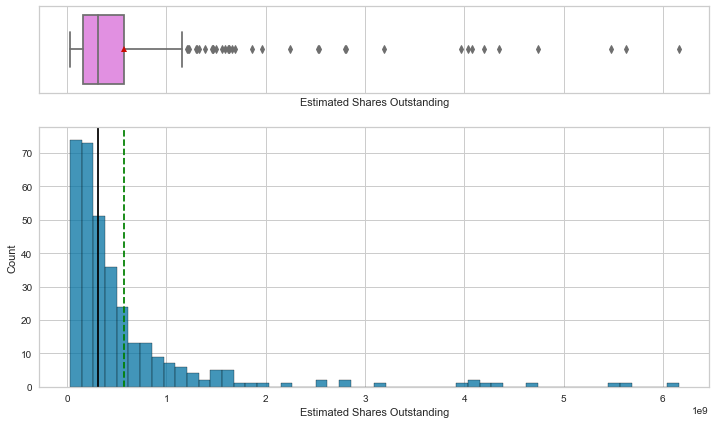

<IPython.core.display.Javascript object>

In [14]:
# Observations on Current Price
histogram_boxplot(data, "Estimated Shares Outstanding")

*Observation*
- The distribution is rightly skewed 
- There are heavy outliers to the right
- As the estimated shares outstanding increases in number the count reduces

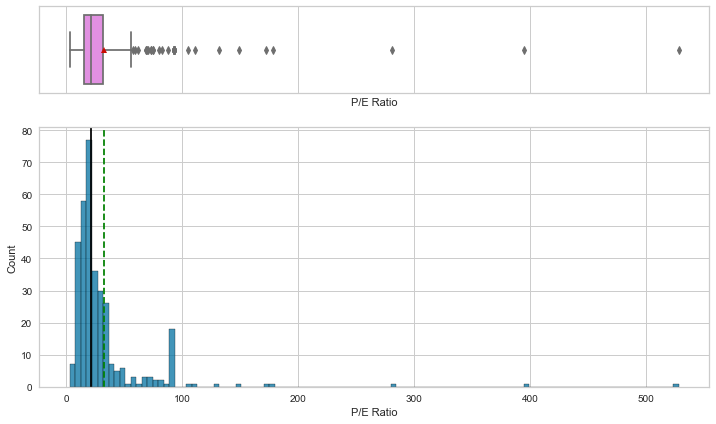

<IPython.core.display.Javascript object>

In [15]:
# Observations on Current Price
histogram_boxplot(data, "P/E Ratio")

*Observation*
- The distribution is skewed to the right
- There are outliers to the right

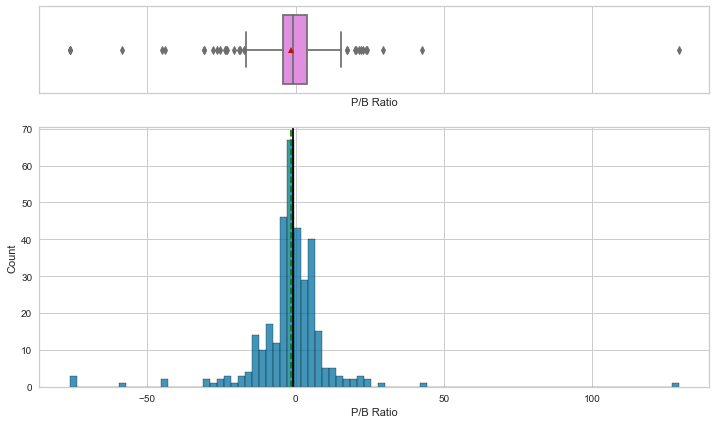

<IPython.core.display.Javascript object>

In [16]:
# Observations on Current Price
histogram_boxplot(data, "P/B Ratio")

*Observation*
- The distribution is on both the right and left sides
- Ther are outliers on both sides
- The average P/E Ration is on zero, and that's the maximum count

## Exploring categorical variables

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

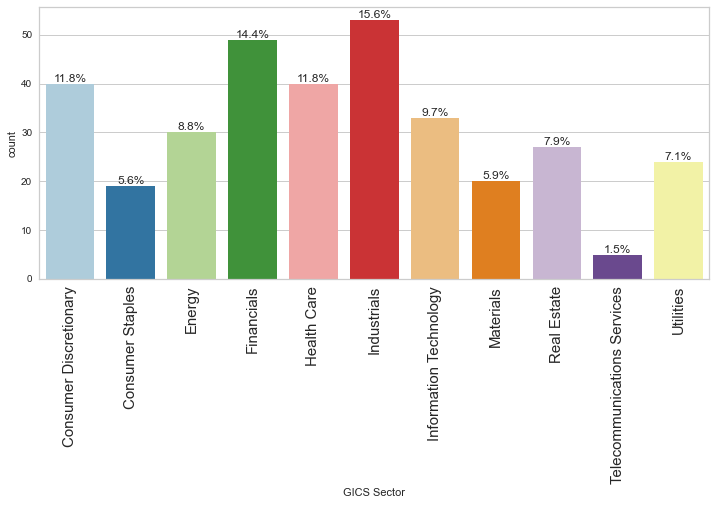

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(data, "GICS Sector", perc=True)

*Observation*
- Industrial sector had the highest income percentage of 15.6%, followed by the Finacials with 14.4%
- The least sector is Telecommunication services with 15%


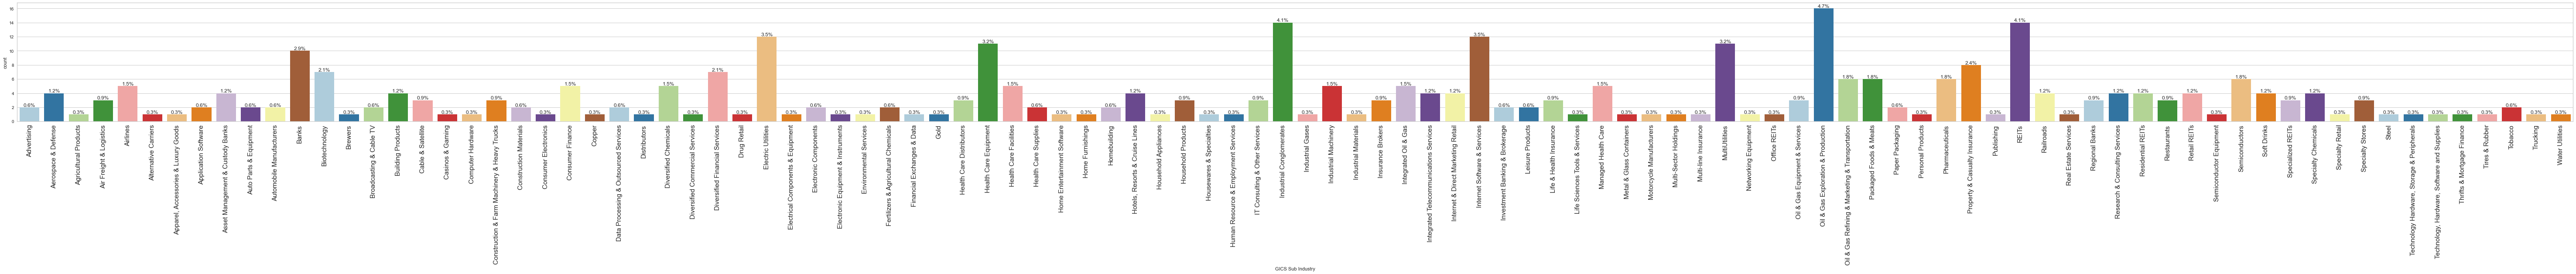

<IPython.core.display.Javascript object>

In [19]:
labeled_barplot(data, "GICS Sub Industry", perc=True)

*Observation*
- The distribution of the sub industries are not visible

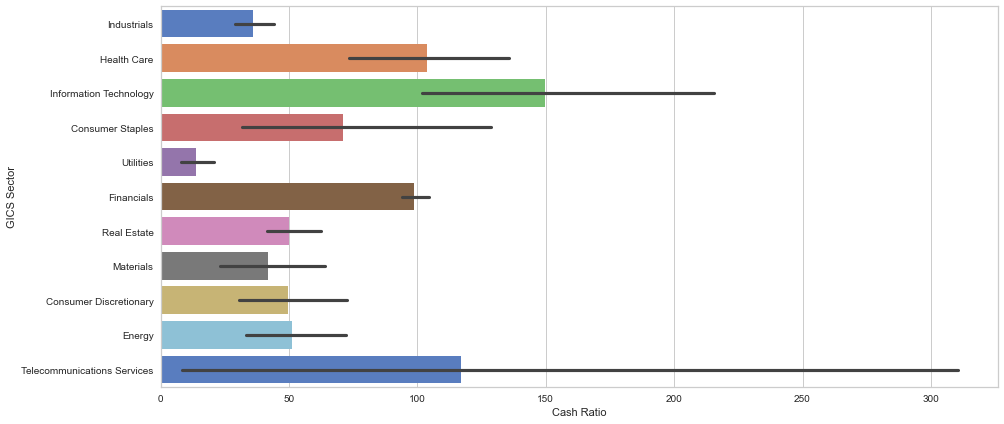

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(15, 7))  # setting the figure size
ax = sns.barplot(x="Cash Ratio", y="GICS Sector", data=data, palette="muted")  # barplot

*Observation*
- Cash Ratio is high in the Telecommunication services sector
- Cash Ratio is least in the utilities sector

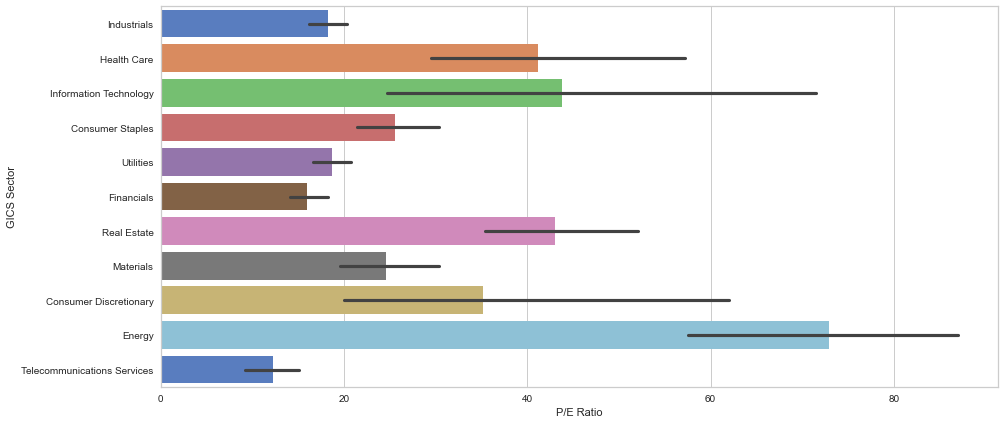

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(15, 7))  # setting the figure size
ax = sns.barplot(x="P/E Ratio", y="GICS Sector", data=data, palette="muted")  # barplot

*Observation*
- P/E Ratio's average cuts across the Health care, Information Technology, and Real Estate sectors
- Energy sector has the highest P/E Ratio

## Bivariate Analysis

**Let's check for correlations.**

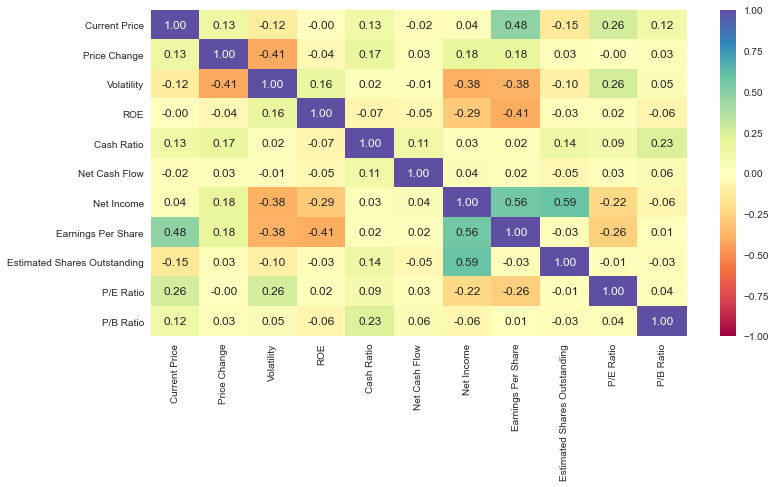

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

 *Observation*
- Price change is negatively correlated with Volatility, i.e price fluctuation leads to price change                        - Net income is also negatively correlated with Volatility
- Earnings per share is negatively correlated with Volatility & ROE
- Earnings per share is positively correlated with current price
- Net income is positively correlated with both Earnings per share and Estimated shares outstanding
- Current price is positively correlated with Earnings per share

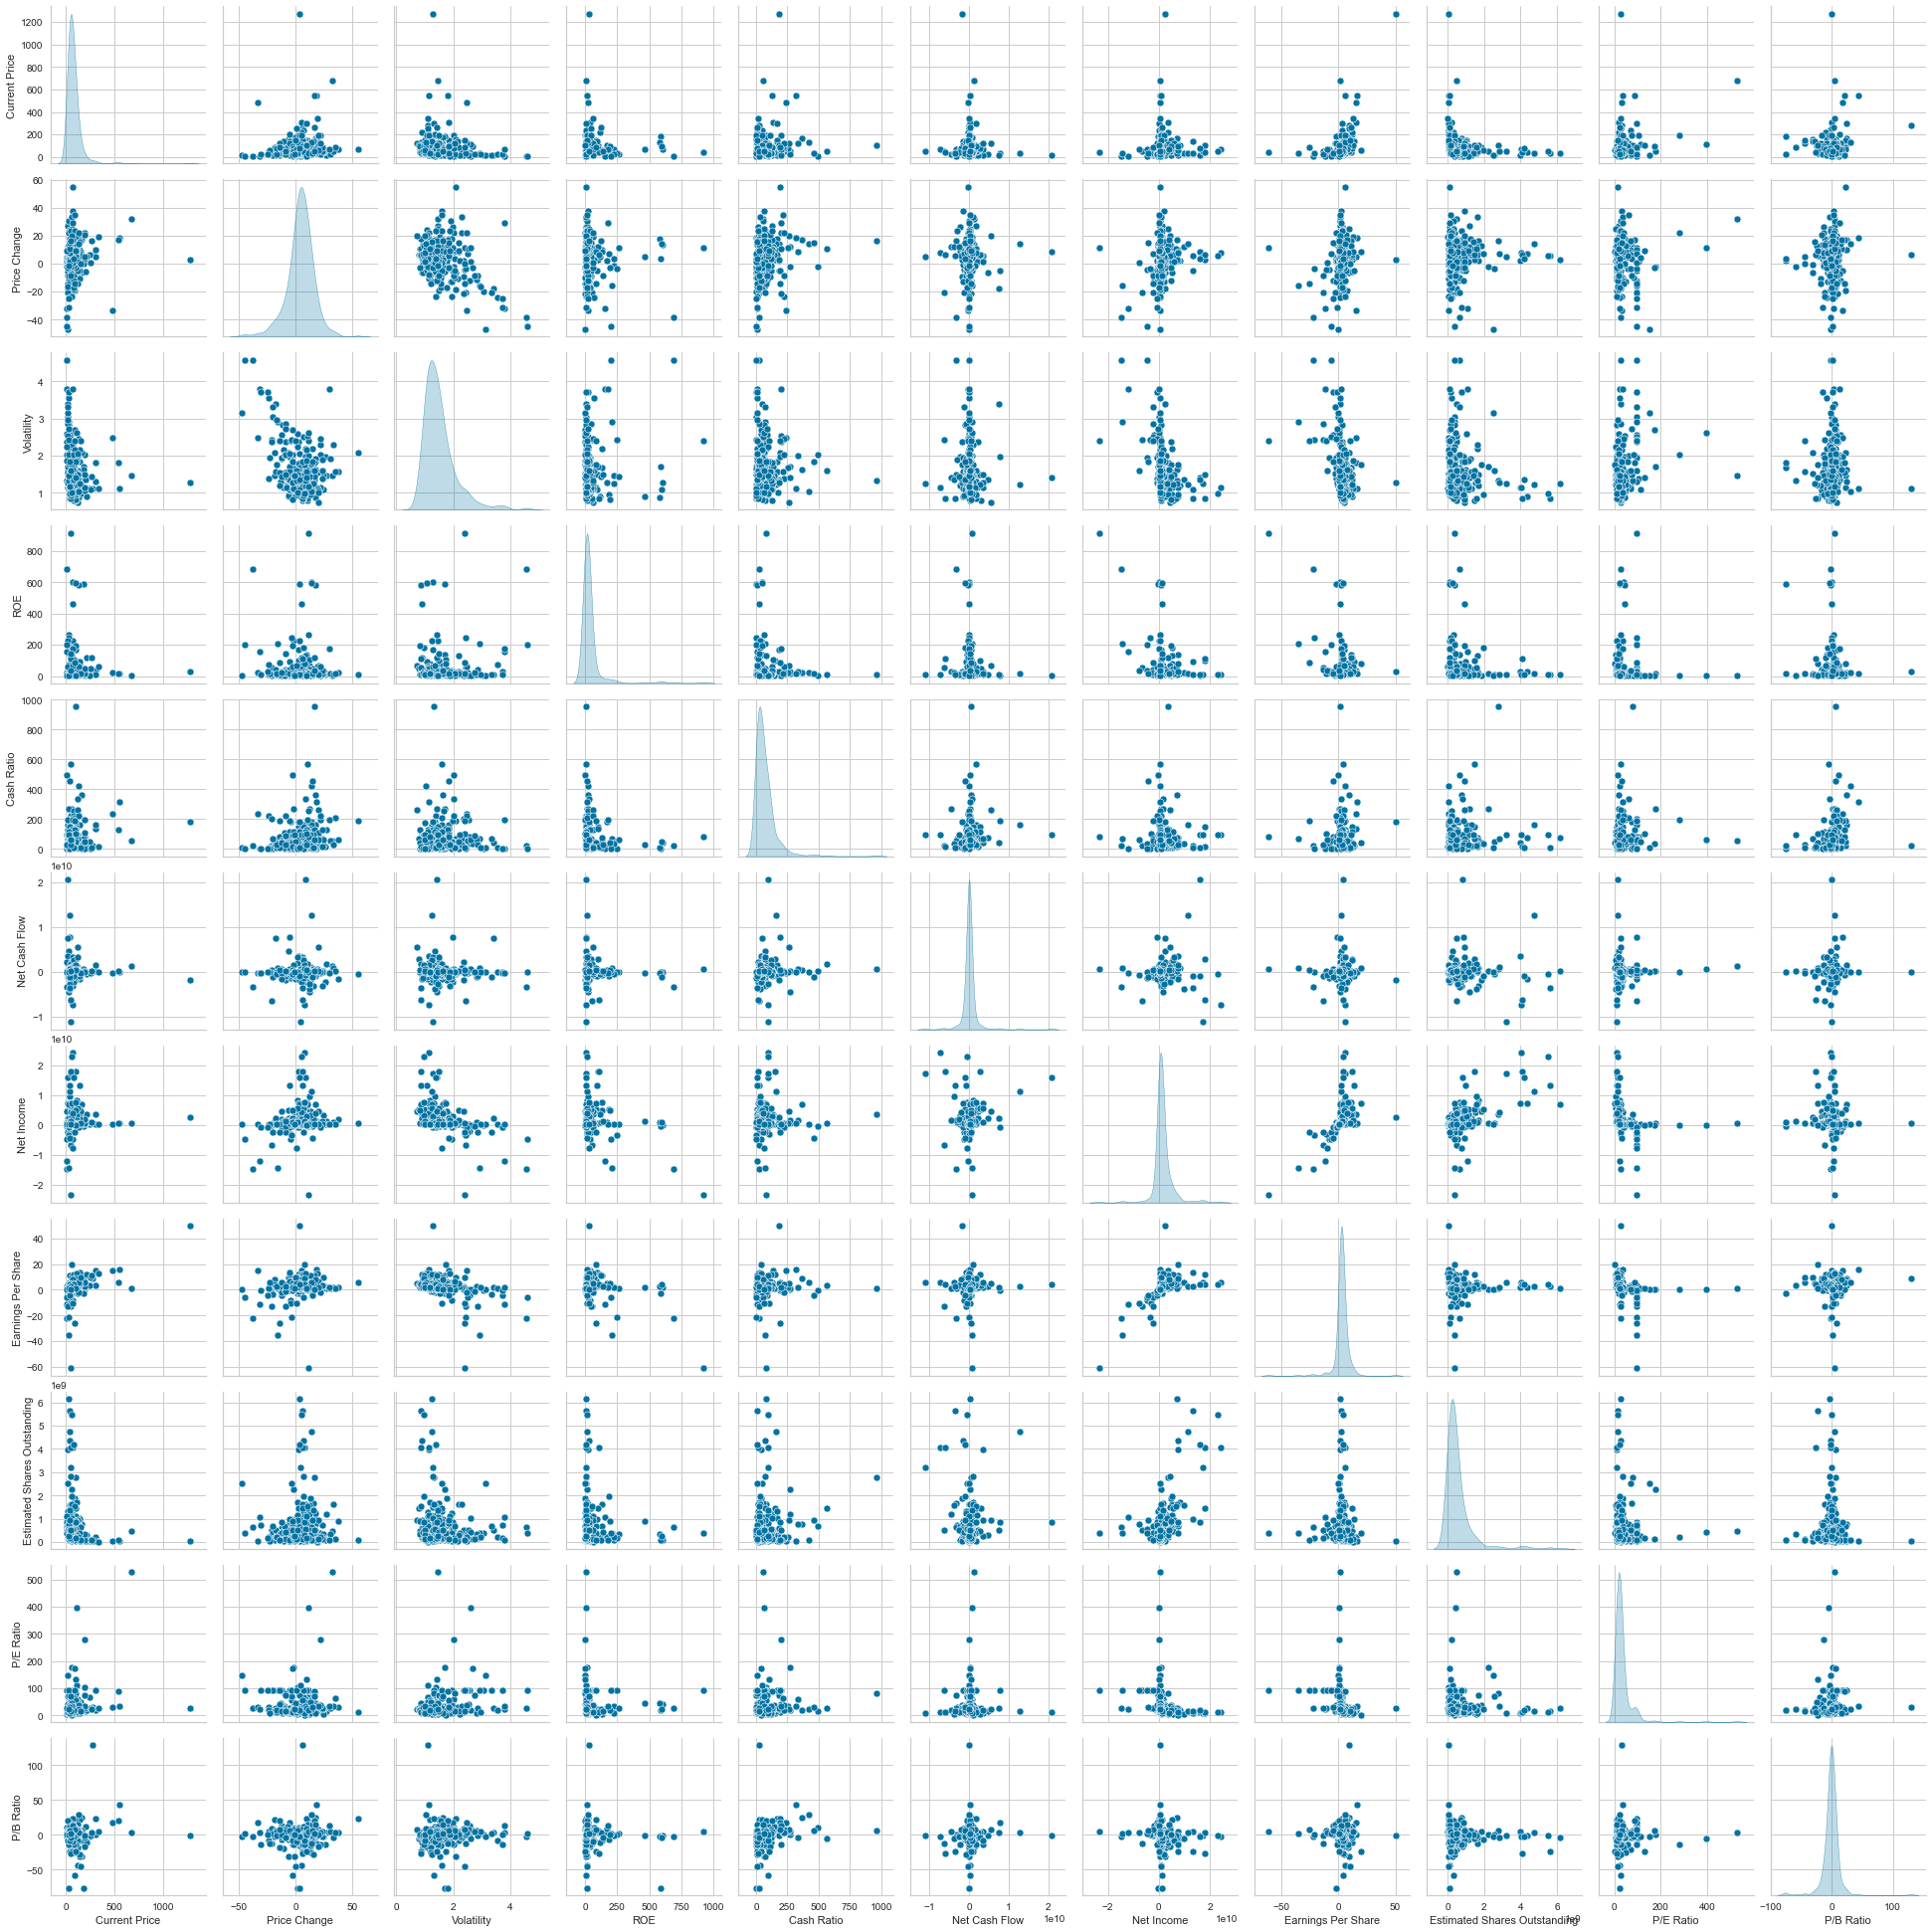

<IPython.core.display.Javascript object>

In [35]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

*Observation*
- Price change affects all other financial indicators

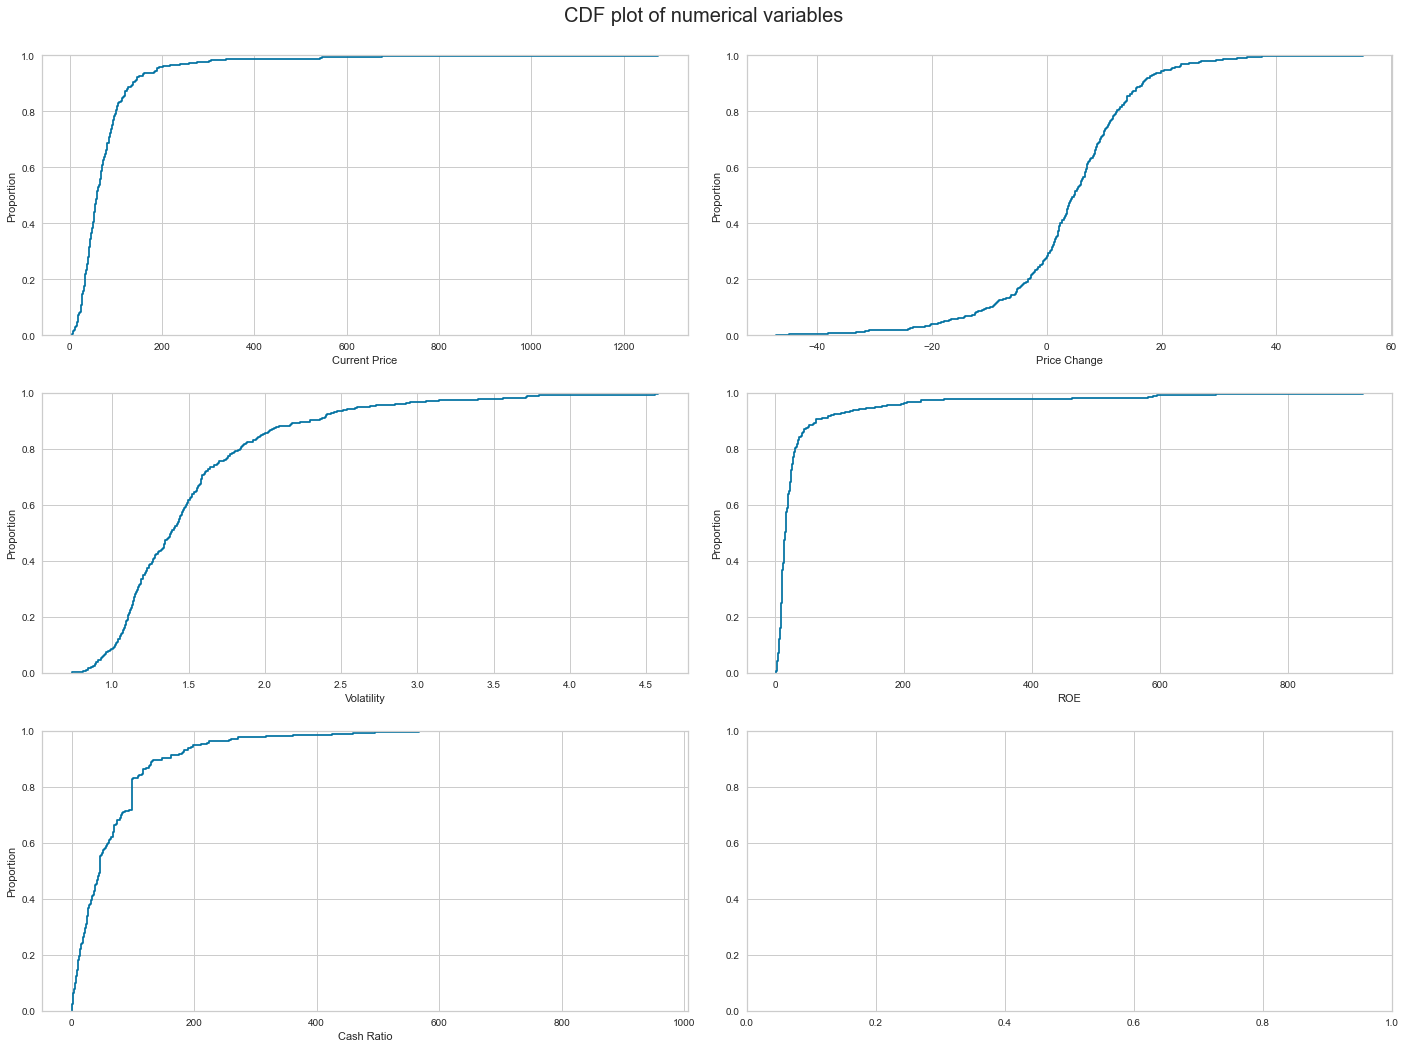

<IPython.core.display.Javascript object>

In [39]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=data[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=data[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observation**
- Stock prices grows from zero and grows gradually to become high

In [23]:
data.groupby("GICS Sector")["Price Change"].mean()

GICS Sector
Consumer Discretionary          5.846093
Consumer Staples                8.684750
Energy                        -10.228289
Financials                      3.865406
Health Care                     9.585652
Industrials                     2.833127
Information Technology          7.217476
Materials                       5.589738
Real Estate                     6.205548
Telecommunications Services     6.956980
Utilities                       0.803657
Name: Price Change, dtype: float64

<IPython.core.display.Javascript object>

**Observation**
 - The Health care sector had the highest price change 
 - Energy sector had the least price change

In [6]:
data.groupby("GICS Sector")["Cash Ratio"].mean()

GICS Sector
Consumer Discretionary          49.575000
Consumer Staples                70.947368
Energy                          51.133333
Financials                      98.591837
Health Care                    103.775000
Industrials                     36.188679
Information Technology         149.818182
Materials                       41.700000
Real Estate                     50.111111
Telecommunications Services    117.000000
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

<IPython.core.display.Javascript object>

-Relationship between economic sectors and cash ratio

**Questions**:

1. What does the distribution of stock prices look like?

Ans:
    - The distribution of stock prices are fluctuating moving from negative to positive
    
2. The stocks of which economic sector have seen the maximum price increase on average?

Ans:
  - The health care sector has the maximum price increase on average
    
3. How are the different variables correlated with each other?

Ans:
   - Price change is negatively correlated with Volatility, i.e price fluctuation leads to price change                        - Net income is also negatively correlated with Volatility
    - Earnings per share is negatively correlated with ROE
    - Net income is positively correlated with both Earnings per share and Estimated shares outstanding
    - Current price is positively correlated with Earnings per share

4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

Ans:
    - Cash Ratio is high in the Telecommunication services sector
    - Cash Ratio is least in the utilities sector 

5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

Ans:
    - P/E Ratio's average cuts across the Health care, Information Technology, and Real Estate sectors
    - Energy sector has the highest P/E Ratio

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [8]:
# let's check for duplicate observations
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no dplicate values

In [6]:
# fixing the names of columns as there are dots, spaces  in columns names
data.columns = [col.replace(" ", "_") for col in data.columns]
data.columns = [col.replace("-", "_") for col in data.columns]
data.columns = [col.replace(".", "") for col in data.columns]
data.columns = [col.replace("&", "_") for col in data.columns]
data.columns = [col.replace(",", "_") for col in data.columns]
data.columns = [col.replace("*", "_") for col in data.columns]
data.columns = [col.replace("/", "_") for col in data.columns]

<IPython.core.display.Javascript object>

In [7]:
print(data.columns)

Index(['Ticker_Symbol', 'Security', 'GICS_Sector', 'GICS_Sub_Industry',
       'Current_Price', 'Price_Change', 'Volatility', 'ROE', 'Cash_Ratio',
       'Net_Cash_Flow', 'Net_Income', 'Earnings_Per_Share',
       'Estimated_Shares_Outstanding', 'P_E_Ratio', 'P_B_Ratio'],
      dtype='object')


<IPython.core.display.Javascript object>

- Column names have been fixed

In [34]:
# Let's look at the statistical summary of the data
pd.set_option(
    "display.float_format", lambda x: "%.6f" % x
)  # to display numbers rounded off to 3 decimal places

data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker_Symbol,340,340,FLIR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,PepsiCo Inc.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sub_Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current_Price,340.000000,NaN,NaN,NaN,80.862345,98.055086,4.500000,38.555000,59.705000,92.880001,1274.949951
Price_Change,340.000000,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.000000,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.000000,NaN,NaN,NaN,39.597059,96.547538,1.000000,9.750000,15.000000,27.000000,917.000000
Cash_Ratio,340.000000,NaN,NaN,NaN,70.023529,90.421331,0.000000,18.000000,47.000000,99.000000,958.000000
Net_Cash_Flow,340.000000,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.000000,-193906500.000000,2098000.000000,169810750.000000,20764000000.000000


<IPython.core.display.Javascript object>

In [9]:
# checking missing values
data.isna().sum()

Ticker_Symbol                   0
Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P_E_Ratio                       0
P_B_Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

- There are no missing values

### Since the data provided is taken as actual values so it is not necessary to treat outliers

## K-means Clustering

In [72]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

<IPython.core.display.Javascript object>

In [34]:
num_col

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

<IPython.core.display.Javascript object>

In [73]:
# scaling the dataset before clustering
scaler = StandardScaler()

subset = data[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [74]:
# creating a dataframe of the scaled columns
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

In [10]:
subset_scaled_data.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


<IPython.core.display.Javascript object>

**To confirm that data has been scalarized, STD will be close to 1 and mean will be close to 0**

In [24]:
print(subset_scaled_data.Volatility.std(), subset_scaled_data.Volatility.mean())

1.0014738401512915 -6.587867506415451e-17


<IPython.core.display.Javascript object>

C:\Users\BETTY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.1082567471015055
Number of Clusters: 6 	Average Distortion: 2.069402881418923
Number of Clusters: 7 	Average Distortion: 2.01213392603549
Number of Clusters: 8 	Average Distortion: 1.9894659395650167


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

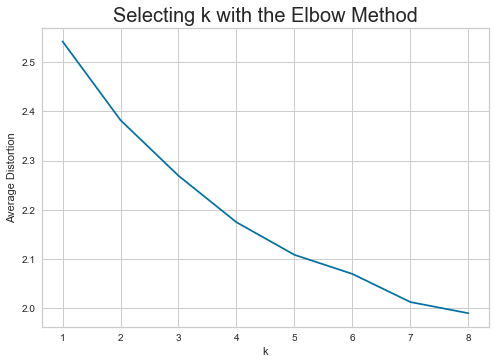

<IPython.core.display.Javascript object>

In [44]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_data)
    prediction = model.predict(subset_scaled_data)
    distortion = (
        sum(
            np.min(
                cdist(subset_scaled_data, model.cluster_centers_, "euclidean"), axis=1
            )
        )
        / subset_scaled_data.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

- The appropriate value might be 4 or 5

 **The optimal value is not clearly seen**
    **Let's check the silhouette scores.**

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.465292959074158
For n_clusters = 4, silhouette score is 0.4524477668631469
For n_clusters = 5, silhouette score is 0.4314106887964818
For n_clusters = 6, silhouette score is 0.4209984163812802
For n_clusters = 7, silhouette score is 0.40559715755363246
For n_clusters = 8, silhouette score is 0.1895654946971861
For n_clusters = 9, silhouette score is 0.3785247661134681


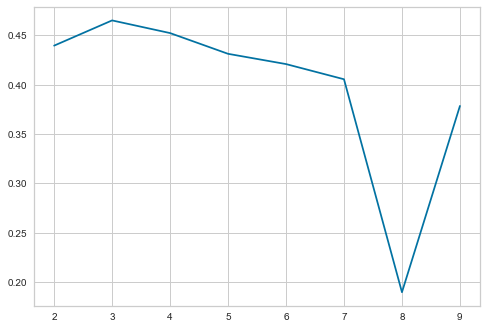

<IPython.core.display.Javascript object>

In [25]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_data))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_data, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

- From Silhouette score it seems that 8 is a good score, as we have a drastic drop there.

**Let's visualize this using shilhouette visualizer**

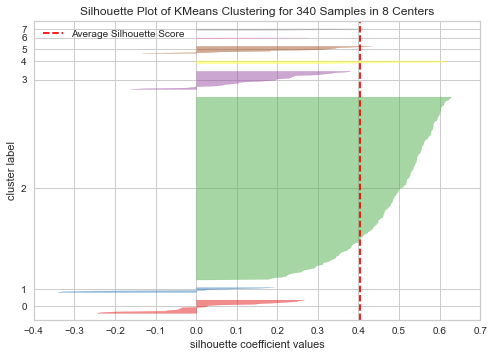

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [63]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

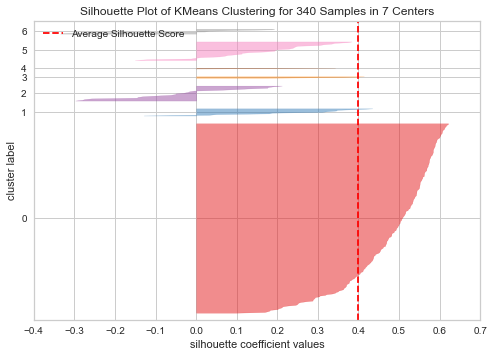

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [64]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

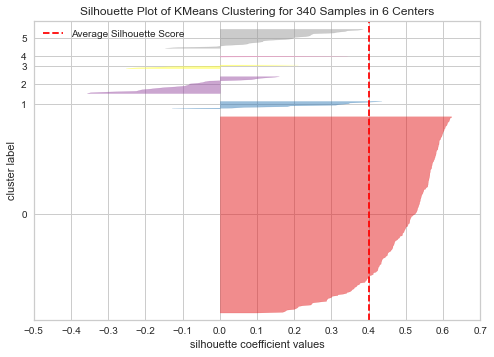

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [65]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

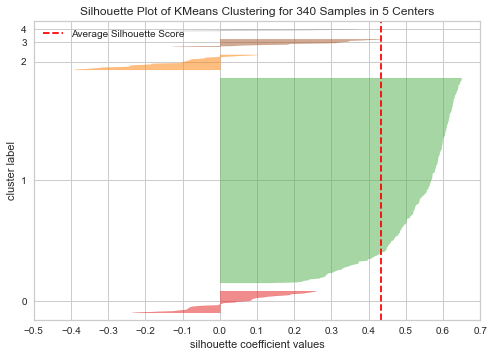

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [66]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

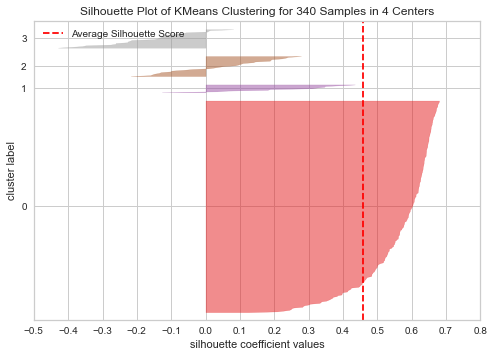

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [67]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

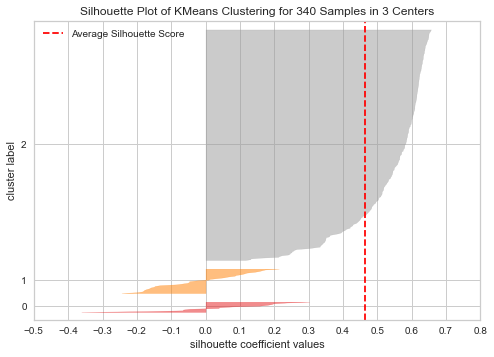

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [68]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

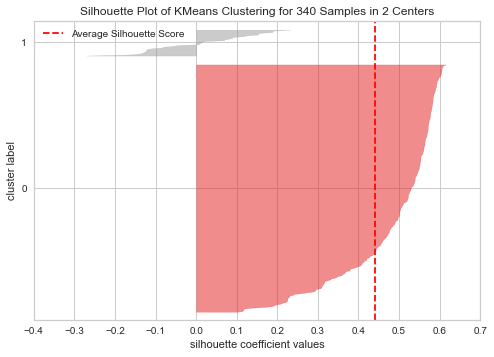

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [69]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

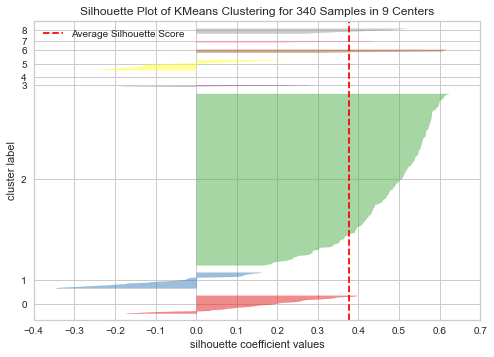

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [33]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

**Obsevation**
- Let's take 8 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 8 in the curve.

In [75]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(subset_scaled_data)

KMeans(random_state=0)

<IPython.core.display.Javascript object>

In [35]:
kmeans.labels_

array([2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 7, 2, 2,
       2, 1, 2, 2, 7, 2, 2, 2, 5, 3, 2, 3, 2, 2, 1, 2, 2, 2, 6, 2, 2, 2,
       3, 0, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 5, 2, 5, 2,
       2, 5, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 3,
       0, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 4, 2, 1, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 4, 2, 5, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 0, 3,
       2, 2, 3, 2, 2, 1, 7, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2,
       2, 0, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       0, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 1, 3, 2,
       2, 4, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,

<IPython.core.display.Javascript object>

In [76]:
# adding kmeans cluster labels to the original dataframe
data["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [34]:
data

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,2
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,2
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,2
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,1
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775,1
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260,2
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449,2
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096,2


<IPython.core.display.Javascript object>

In [77]:
cluster_profile = data.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [78]:
cluster_profile["count_in_each_segment"] = (
    data.groupby("K_means_segments")["Current Price"].count().values
)

<IPython.core.display.Javascript object>

In [79]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,508.534992,5.732177,1.504640,27.250000,150.875000,37895875.000000,1116994125.000000,15.965000,75654420.935000,43.727459,29.581664,8
1,80.152167,14.571437,1.829679,28.100000,321.850000,625929050.000000,942050500.000000,2.010500,790456335.265000,45.067457,8.307945,20
2,71.419603,4.948894,1.373081,25.337121,51.272727,19976181.818182,1588185079.545455,3.719489,438021401.544886,23.214179,-3.335092,264
3,34.231808,-15.515565,2.832069,48.037037,47.740741,-128651518.518519,-2444318518.518518,-6.284444,503031539.057037,75.627265,1.655990,27
4,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
5,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
6,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
7,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3


<IPython.core.display.Javascript object>

**Observations**

- There are 8 clusters in all with labels (0 to 7). The highlighted are the maximum values for each subset under a cluster.

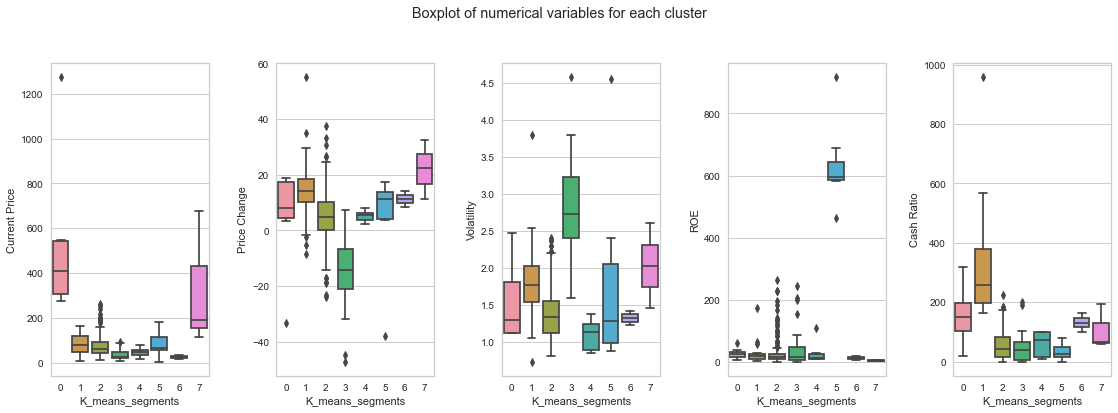

<IPython.core.display.Javascript object>

In [36]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[num_col[counter]], x=data["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_segments'>

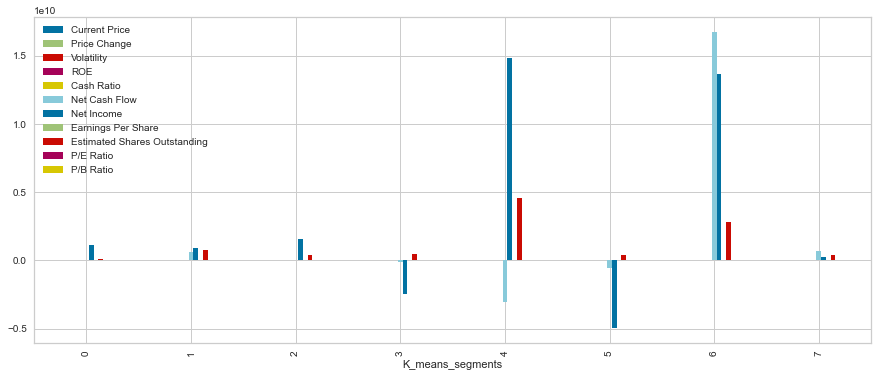

<IPython.core.display.Javascript object>

In [58]:
data.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

### Insights

- **Cluster 0**:
    - Current price ranges from low to moderate with a few lows.
    - Price change ranges from low to moderate with a few high and low.
    - Volatility ratings are low to moderate, with a few highs.
    - ROE ratings low with a few highs.
    - Cash Ratio ratings low to moderate with few lows and few highs.


- **Cluster 1**:
    - Current Price ratings are low with a few low and a few high.
    - Current price ranges from low to moderate with few lows and very highs.
    - Volatility ranges from low to moderate with few lows and very highs..
    - ROE ratings are very low with a few highs.
    - Cash Ratio ratings low to moderate with few lows and very highs.


- **Cluster 2**:
    - Current price ratings are low with a few highs.
    - Price change ratings is low with a few lows and highs.
    - Volatility ratings are low with a few low and very highs.
    - ROE very low with a few highs.
    - Cash Ratio ratings are low with a few highs.


- **Cluster 3**:
    - Current price ratings are low with a few high.
    - Price change ratings are very low with a few lows and highs.
    - Volatility ratings are moderate to high with a few highs and lows .
    - ROE ratings are low with a few highs.
    - Cash Ratio ratings are low with a few highs.


- **Cluster 4**:
    - Current price ratings are low with a few high and low.
    - Price change ratings low with a few low and high.
    - Volatility ratings are low with a few high.
    - ROE ratings are very low with a few high.
    - Cash Ratio ratings are low.
    
    
- **Cluster 5**:
    - Current price ratings are low with a few high and a few low.
    - Price change ratings are low with a few high and a very low.
    - Volatility ranges from low to moderate with a few low and a few high.
    - ROE ratings are high with a few low and a very high.
    - Cash Ratio ratings low with a few low and a few high.


- **Cluster 6**:
    - Current price ratings are very low.
    - Price change ratings low with a few low and high.
    - Volatility ratings low with a few low and high.
    - ROE ratings very low.
    - Cash Ration ratings are low with a few low and a few high.


- **Cluster 7**:
    - Current price ranges from low to moderate with a few low and a few high.
    - Price change is moderate with a few low and a few high.
    - Volatility ratings are moderate with a few low and a few high.
    - ROE ratings very low.
    - Cash Ration ratings are low with a few high.

## Hierarchical Clustering

In [39]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_data, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_data))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524589.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850003.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

<IPython.core.display.Javascript object>

In [40]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [41]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_data, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_data))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [42]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

**Let's see the dendrograms for the different linkage methods.**

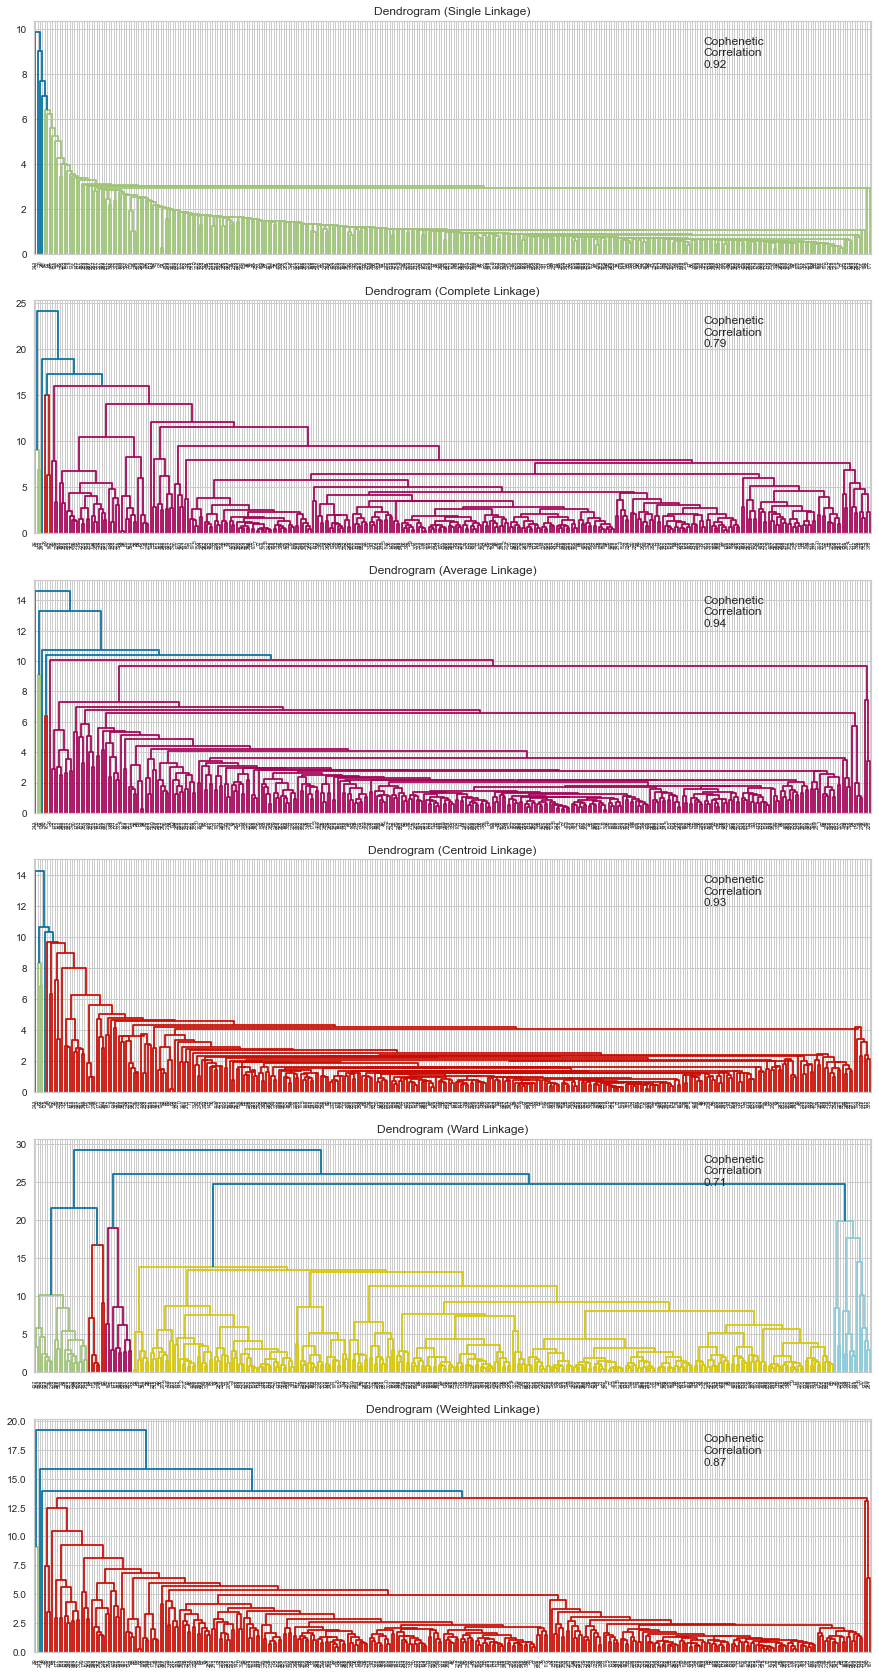

<IPython.core.display.Javascript object>

In [54]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_data, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_data))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- Dendrogram for Ward linkage shows distinct and separate clusters.

In [55]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
data_cc = pd.DataFrame(compare, columns=compare_cols)
data_cc

,Linkage,Cophenetic Coefficient
0,single,0.923227
1,complete,0.787328
2,average,0.942254
3,centroid,0.931401
4,ward,0.710118
5,weighted,0.869378


<IPython.core.display.Javascript object>

**Let's see the dendrogram for Mahalanobis and Manhattan distances with average and weighted linkage methods (as they gave high cophenetic correlation values).**

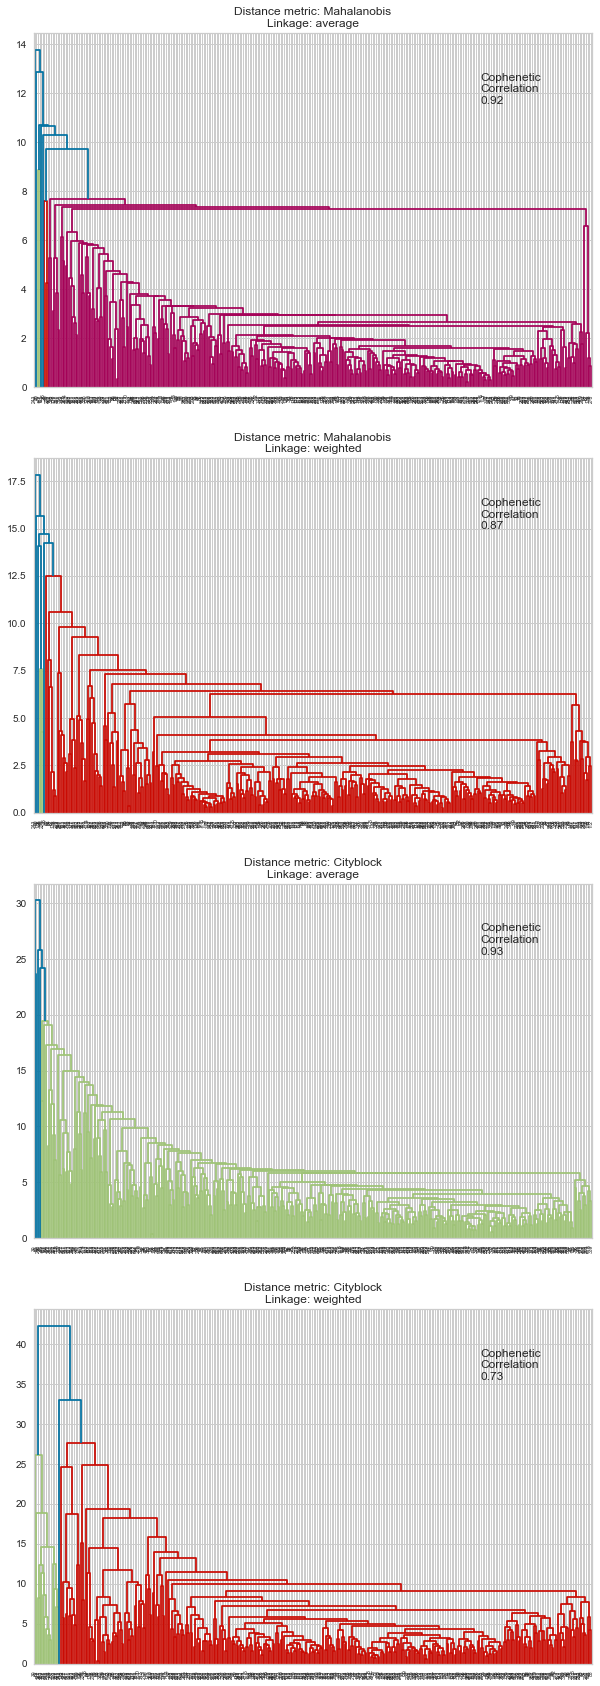

<IPython.core.display.Javascript object>

In [56]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_data, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_data))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

**Observations**

- Out of all the dendrograms we saw, it is clear that the dendrogram with Ward linkage gave us separate and distinct clusters.
- 3 would be the appropriate number of the clusters from the dendrogram with Ward linkage method. 

**Let's create 8 clusters.**

In [80]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_data)

AgglomerativeClustering(n_clusters=3)

<IPython.core.display.Javascript object>

In [81]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_data["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [82]:
cluster_profile = data.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [83]:
cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Current Price"].count().values
)

<IPython.core.display.Javascript object>

In [84]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,85.432291,5.480804,1.437853,25.043333,72.846667,90396470.000000,1504889533.333333,3.861850,451393538.682100,29.141303,-1.557727,1.946667,300
1,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,3.482759,29
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,4.363636,11


<IPython.core.display.Javascript object>

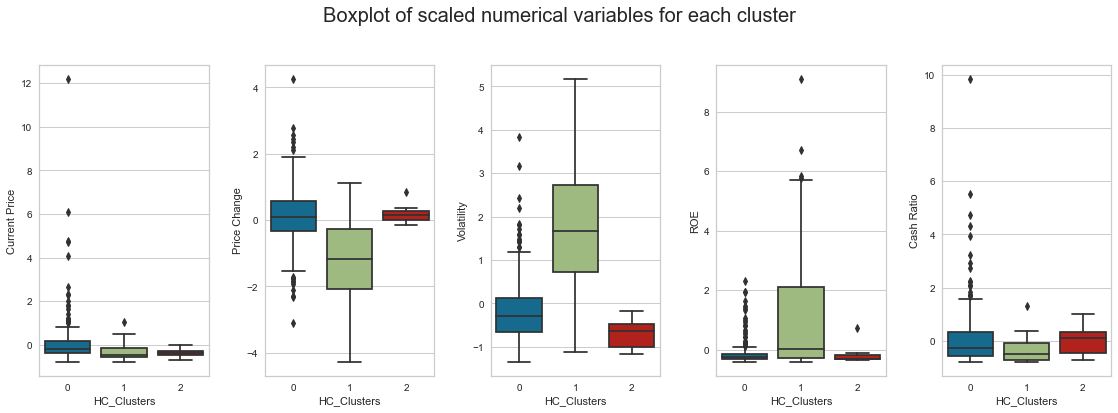

<IPython.core.display.Javascript object>

In [19]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_data[num_col[counter]],
        x=subset_scaled_data["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - Current price ratings is low to moderate with few lows and much very highs.
    - Price change range from very low to moderate with few lows and much very highs.
    - Volatility ratings are very low to moderate, with few lows and many highs
    - ROE ratings are low with a few highs.
    - Cash Ratio ratings are low to moderate, with a many very highs.


- **Cluster 1**:
    - Current price ratings is low to moderate with a few high.
    - Current price are low to moderate with high lows and high highs.
    - Volatility ratings are low to high with few lows and very highs.
    - ROE ratings are low to moderate with very highs.
    - Cash Ratio ratings are low to moderate with a very highs.


- **Cluster 2**:
    - Current price ratings are very low.
    - Price change is low.
    - Volatility ratings are very low with a few high.
    - ROE ratings are low with a few high.
    - Cash Ratio ratings are low with a few low and a few high.



## K-means vs Hierarchical Clustering

#### Lets compare the two clustering methods;

## K-means clustering
-  There is need to choose the initial value of K from a range and run algorithm severally to get the best number
-  Computation time was faster
-  Did not give a clear visibility for interpretation
-  Got 8 clusters of which 5 clusters had same characteristics and 2 a differnt character. But these could have been put  together to get a smaller number of clusters.

## Hierarchical clustering

-  There is no need for initial value of K
-  Computation time was longer
-  Gave a clear visibility for interpretation
-  Got 3 clusters that were distinct and separate, and each group had different interpretations



## Actionable Insights and Recommendations


- **Cluster 5 from K-Means*: These are the # 1 stock mackets that have excellent ROE, moderate volatility, low current price and price change with few highs & low cash ratio with few highs. **Companies looking for how to increase their financial performance with a minimal risk should approach this cluster for ROE and Volatility.**



- **Cluster 6 in K-Means**: These are the low performing stock markets. They have very low current price, low price change, low volatility, low cash ratio and low ROE **These stock companies will need to concentrate more on marketing and advertisements about their offerings to create awareness and attract investors, thereby increasing ROE.**



- **Cluster 1 from Hierarchical**: These are also # 1 stock markets which are ranging fom low to moderate in current price and do have some highs, price change goes from low to moderate with few highs, volatility is also moderate with few highs, though ROE is low to moderate but with few highs and has quite better cash ratio from low to moderate with very highs.



- **Cluster 2 from Hierarchical**: These are the # 1 stock market for investors in terms of very low current price and low price change, volatility ratings are low, though ROE is low but with few highs and cash ratio is low with few highs. **This cluster of stock market will need to concentrate more on investors and securing tie-ups with corporates to improve ROE.**

